# **Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

In [ ]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd
# Importamos una bbdd en formato excel y lo guardamos en una variable.
path = "/content/drive/MyDrive/BBDD/retail_sales_dataset.csv"
df_1 = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
#Nombre de las columnas existentes en el array, le asigne una variable para luego llamarla más facil.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**✔ Crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.**

In [ ]:
df_1["Ingreso Total"] = df_1["Quantity"] * df_1["Price per Unit"] #creacion de columna ingreso total.

In [ ]:
#Maximo
max_price = df_1["Ingreso Total"].max()
#Minimo
min_price = df_1["Ingreso Total"].min()
max_price,min_price #valores maximos y minimos de la columna ingreso total.


(2000, 25)

**Normalización**:
Cuando se tienen datos y se distancian mucho entre ellos, es mejor normalizar los datos para que se puedan ajustar a la grafica. Un caso comun es usar los valores minimos y maximos de una columna. Tambíen aveces se usan los logaritmos, entre otras... Para esta ocación usaré los maximos y minimos.

In [ ]:
df_1["Normalizado"] = (df_1["Ingreso Total"]- min_price)/(max_price - min_price)

**✔ Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).**

pd.cut , dentro de todas sus funciones puede segmentar. Sin embargo, para su segmentación realizaré el calculo de un "paso", que es la diferencia entre el rango que hay entre maximo y minimo y dividido por la cantidad de categorias, que en este caso son 3.

In [ ]:
#calculo del rango
rango = df_1["Ingreso Total"].max() - df_1["Ingreso Total"].min()
rango

1975

In [ ]:
#Calculo del paso
paso = rango/3  #3 por que es, alta, media y baja.
paso

658.3333333333334

In [ ]:
df_1["Clasificación Venta"] = pd.cut(df_1["Ingreso Total"],   #creacion de nueva columna
                                   bins=[-1, 683.33, 1341.66, 2000], #-1 por que así parte de 0 hasta 683, de 683 a 1341 y de 1341 a 2000.
                                   labels=["Baja", "Media", "Alta"]) #aqui le atribuye a cada segmento su etiqueta.

**✔ Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.**

Para esto agruparé las columnas de product category,total amount y date.

In [ ]:
df_1.info() #Miramos que date sea del tipo datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Transaction ID       1000 non-null   int64   
 1   Date                 1000 non-null   object  
 2   Customer ID          1000 non-null   object  
 3   Gender               1000 non-null   object  
 4   Age                  1000 non-null   int64   
 5   Product Category     1000 non-null   object  
 6   Quantity             1000 non-null   int64   
 7   Price per Unit       1000 non-null   int64   
 8   Total Amount         1000 non-null   int64   
 9   Ingreso Total        1000 non-null   int64   
 10  Normalizado          1000 non-null   float64 
 11  Clasificación Venta  1000 non-null   category
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 87.2+ KB


In [ ]:
#Como no era datetime, se tansforma a datetieme.
df_1["Date"] = pd.to_datetime(df_1["Date"])

In [ ]:
df_grupo1 = df_1.groupby(["Product Category", "Date"])["Ingreso Total"].sum().reset_index() #agrupo dos columnas, indico que columnas sumar, aplico la suma por grupo y el reset para darle valor de columna.
df_grupo1

,Product Category,Date,Ingreso Total
0,Beauty,2023-01-01,1500
1,Beauty,2023-01-02,25
2,Beauty,2023-01-03,600
3,Beauty,2023-01-04,1090
4,Beauty,2023-01-05,50
...,...,...,...
650,Electronics,2023-12-27,600
651,Electronics,2023-12-28,75
652,Electronics,2023-12-29,100
653,Electronics,2023-12-31,50


In [ ]:
df_1.groupby(["Product Category", "Date"])["Ingreso Total"].agg(["sum","mean","count","min","max","std","var"]).reset_index()


,Product Category,Date,sum,mean,count,min,max,std,var
0,Beauty,2023-01-01,1500,1500.0,1,1500,1500,NaN,NaN
1,Beauty,2023-01-02,25,25.0,1,25,25,NaN,NaN
2,Beauty,2023-01-03,600,600.0,1,600,600,NaN,NaN
3,Beauty,2023-01-04,1090,545.0,2,90,1000,643.467171,414050.0
4,Beauty,2023-01-05,50,50.0,1,50,50,NaN,NaN
...,...,...,...,...,...,...,...,...,...
650,Electronics,2023-12-27,600,600.0,1,600,600,NaN,NaN
651,Electronics,2023-12-28,75,37.5,2,25,50,17.677670,312.5
652,Electronics,2023-12-29,100,100.0,1,100,100,NaN,NaN
653,Electronics,2023-12-31,50,50.0,1,50,50,NaN,NaN


**✔ Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.**

Calcularé las ventas mayores a 1000 de los productos por categoria, para este caso como ya tengo la columna ingresos totales, haré una función que establezca un filtro para ventas mayores a 1000. Luego, llamaré a la función para aplicarla a la columna Product Category.

In [ ]:
def contar_altas(ventas):  #creación de la función.
    return (ventas["Ingreso Total"] > 1000).sum()
df_1.groupby("Product Category").apply(contar_altas)


<ipython-input-24-3169813509>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_1.groupby("Product Category").apply(contar_altas)


,0
Product Category,
Beauty,48
Clothing,52
Electronics,53


In [ ]:
#Calculo de la desviación de cada venta respecto a la de su grupo.
#Creación de la función.
def desviacion_respecto_media(grupo): #grupo es el parametro
    media = grupo["Ingreso Total"].mean() #la variable media es el promedio del parametro trabajando en la columna ingreso total.
    grupo["Desviación respecto a la media"] = grupo["Ingreso Total"] - media
    return grupo

#aplicación de la función
df_1.groupby("Product Category").apply(desviacion_respecto_media)

<ipython-input-27-3353100051>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_1.groupby("Product Category").apply(desviacion_respecto_media)


Transaction ID       Date Customer ID  Gender  Age  \
Product Category                                                           
Beauty           0                 1 2023-11-24     CUST001    Male   34   
                 4                 5 2023-05-06     CUST005    Male   30   
                 5                 6 2023-04-25     CUST006  Female   45   
                 11               12 2023-10-30     CUST012    Male   35   
                 20               21 2023-01-14     CUST021  Female   50   
...                              ...        ...         ...     ...  ...   
Electronics      988             989 2023-12-28     CUST989  Female   44   
                 991             992 2023-08-21     CUST992  Female   57   
                 992             993 2023-02-06     CUST993  Female   48   
                 998             999 2023-12-05     CUST999  Female   36   
                 999            1000 2023-04-12    CUST1000    Male   47   

                     Product Category  Quantity  Price per Unit  Total Amount  \
Product Category                                                                
Beauty           0             Beauty         3              50           150   
                 4             Beauty         2              50           100   
                 5             Beauty         1              30            30   
                 11            Beauty         3              25            75   
                 20            Beauty         1             500           500   
...                               ...       ...             ...           ...   
Electronics      988      Electronics         1              25            25   
                 991      Electronics         2              30            60   
                 992      Electronics         3              50           150   
                 998      Electronics         3              50           150   
                 999      Electronics         4              30           120   

                      Ingreso Total  Normalizado Clasificación Venta  \
Product Category                                                       
Beauty           0              150     0.063291                Baja   
                 4              100     0.037975                Baja   
                 5               30     0.002532                Baja   
                 11              75     0.025316                Baja   
                 20             500     0.240506                Baja   
...                             ...          ...                 ...   
Electronics      988             25     0.000000                Baja   
                 991             60     0.017722                Baja   
                 992            150     0.063291                Baja   
                 998            150     0.063291                Baja   
                 999            120     0.048101                Baja   

                      Desviación respecto a la media  
Product Category                                      
Beauty           0                        -317.47557  
                 4                        -367.47557  
                 5                        -437.47557  
                 11                       -392.47557  
                 20                         32.52443  
...                                              ...  
Electronics      988                      -433.78655  
                 991                      -398.78655  
                 992                      -308.78655  
                 998                      -308.78655  
                 999                      -338.78655  

[1000 rows x 13 columns]

# **Análisis Descriptivo y Visualización**
* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [ ]:
#Calculo de estadisticas descriptivas básicas para comprender mejor las caracteristicas de los datos.
df_1.describe(include='all').T #usar el "include=all" incorpora otros datos como count y unique.

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,NaN,NaN,NaN,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,NaN,NaN,NaN,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,NaN,NaN,NaN,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Ingreso Total,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632


##**Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave**

**Distribución de edad de clientes.**

<Axes: xlabel='Age', ylabel='Count'>

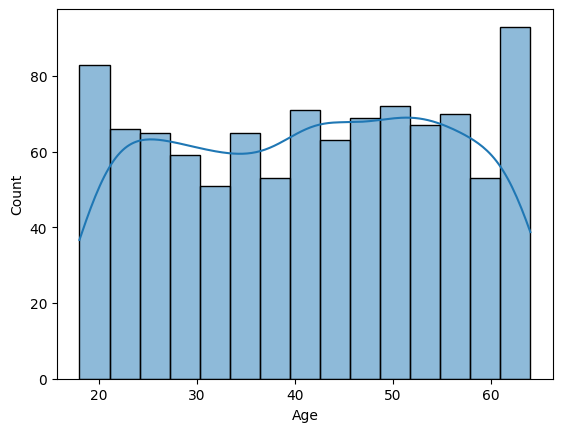

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_1, x='Age', bins=15, kde=True)

**Distribución de Edad por Género**

<Axes: xlabel='Gender', ylabel='Age'>

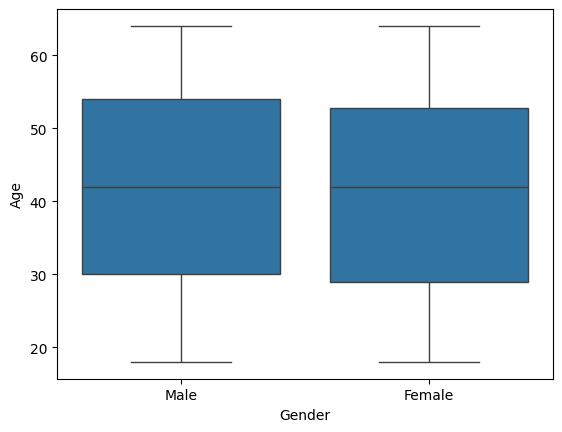

In [ ]:
sns.boxplot(data=df_1, x='Gender', y='Age')

**Distribución de Cantidad Vendida**

<Axes: xlabel='Quantity', ylabel='Count'>

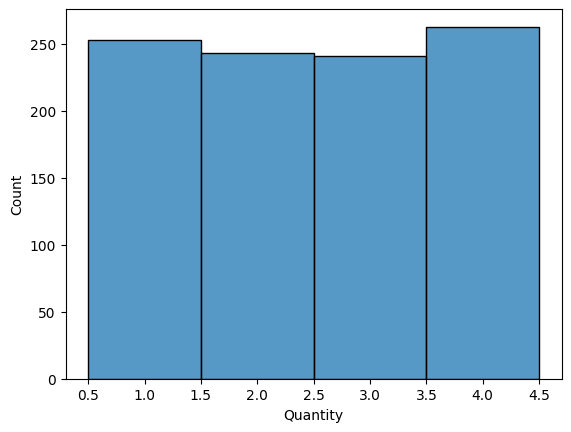

In [ ]:
sns.histplot(data=df_1, x='Quantity', bins=5, discrete=True)

**Cantidad Vendida por Género**

<Axes: xlabel='Gender', ylabel='Quantity'>

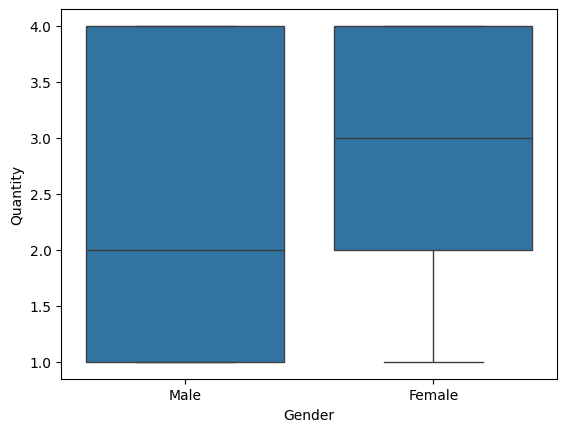

In [ ]:
sns.boxplot(data=df_1, x='Gender', y='Quantity')

# **Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.**

In [ ]:
# Asegurarse que la columna 'Date' esté en formato de fecha
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [ ]:
# Agrupamos por fecha y sumamos el total de ventas de cada día
ventas_por_fecha = df_1.groupby('Date')['Total Amount'].sum().reset_index()

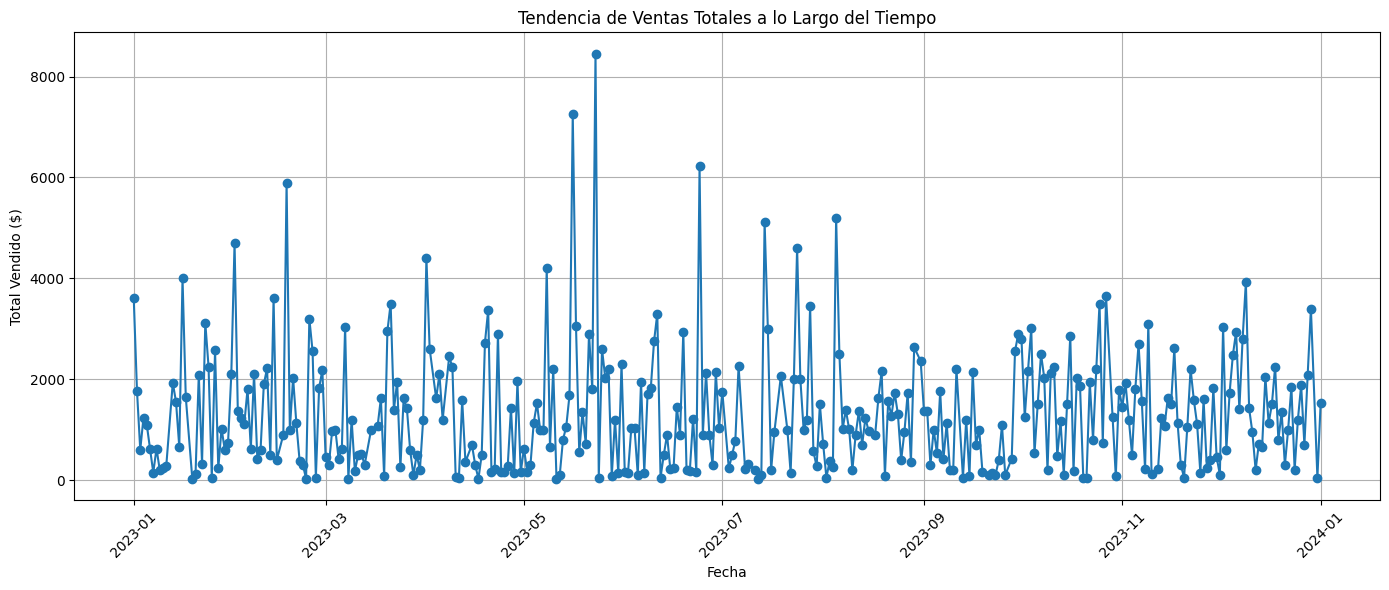

In [ ]:
# Creamos el gráfico de línea
plt.figure(figsize=(14, 6))
plt.plot(ventas_por_fecha['Date'], ventas_por_fecha['Total Amount'], marker='o', linestyle='-')
plt.title('Tendencia de Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Vendido ($)')
plt.xticks(rotation=45)  # Gira las fechas para mejor lectura
plt.tight_layout()
plt.grid(True)
plt.show()

Grafico de disperción normalizado vs Edad

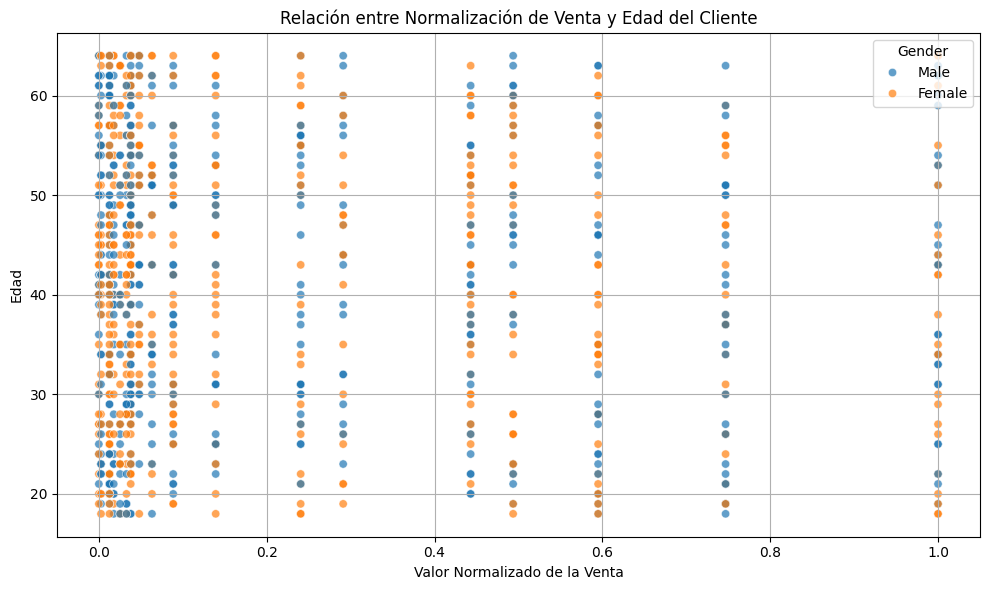

In [ ]:
# Gráfico de dispersión: Normalizado vs Edad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='Normalizado', y='Age', hue='Gender', alpha=0.7)
plt.title("Relación entre Normalización de Venta y Edad del Cliente")
plt.xlabel("Valor Normalizado de la Venta")
plt.ylabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()

Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

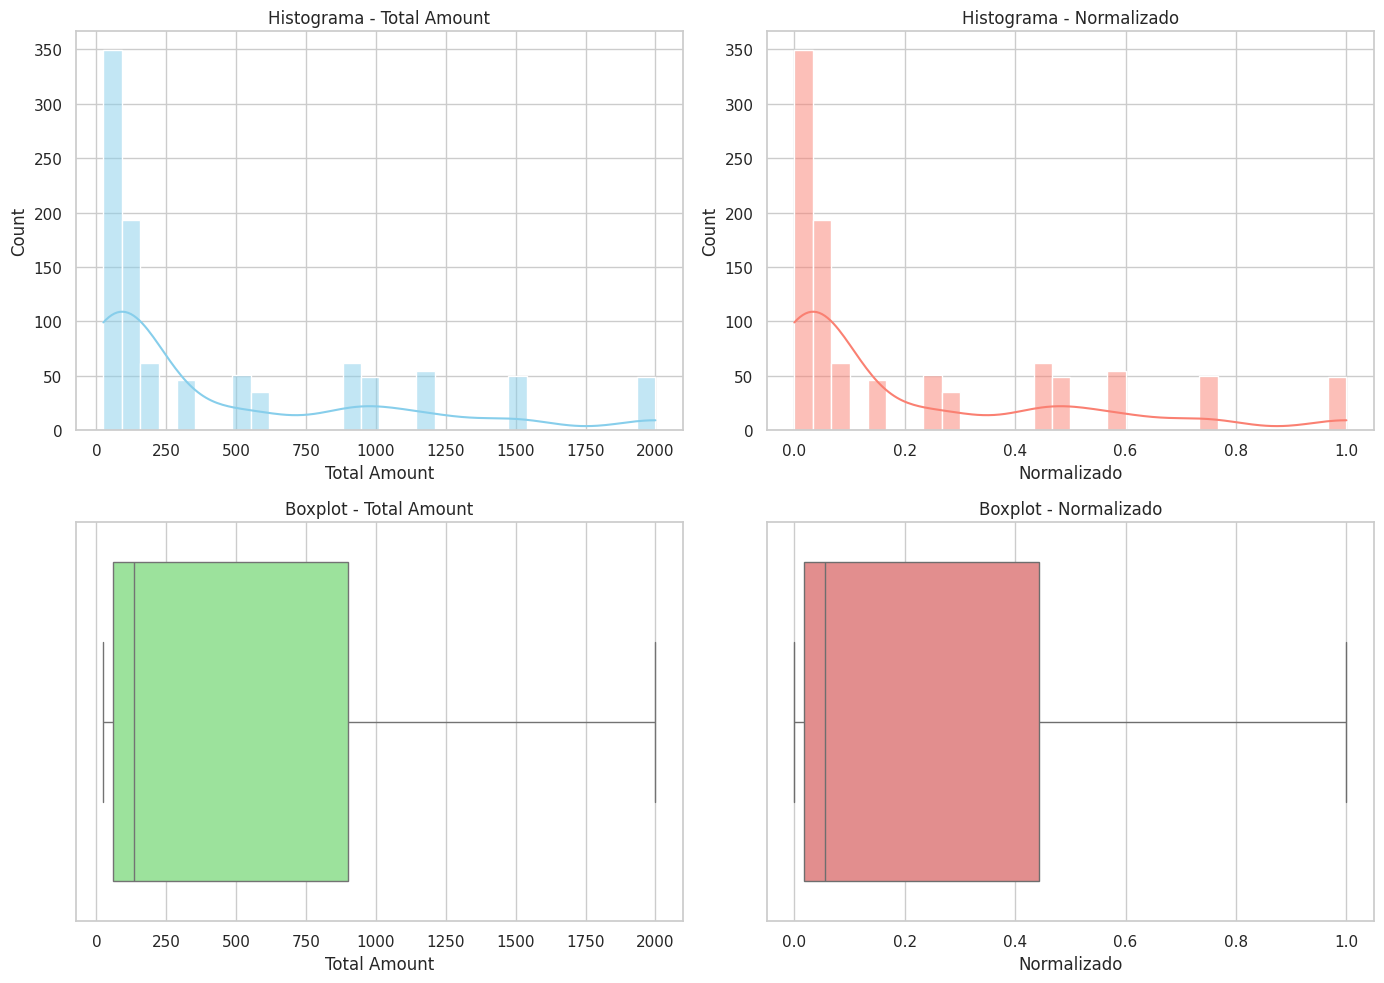

In [ ]:
# Configurar estilo de gráficos
sns.set(style='whitegrid')

# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# === TOTAL AMOUNT ===

# Histograma
sns.histplot(data=df_1, x='Total Amount', bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histograma - Total Amount')

# Boxplot
sns.boxplot(data=df_1, x='Total Amount', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Boxplot - Total Amount')

# === NORMALIZADO ===

# Histograma
sns.histplot(data=df_1, x='Normalizado', bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Histograma - Normalizado')

# Boxplot
sns.boxplot(data=df_1, x='Normalizado', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Boxplot - Normalizado')

# Ajustar layout final
plt.tight_layout()
plt.show()
